In [13]:
import pickle
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fut_squad_evolver.fut_elements.crossover import SquadCrossover
from fut_squad_evolver.fut_elements.genotype import Squad
from fut_squad_evolver.fut_elements.initializer import SquadInitializer
from fut_squad_evolver.fut_elements.mutator import SquadMutator
from fut_squad_evolver.fut_elements.stopper import SquadStopper
from fut_squad_evolver.nsga2.evaluator import Evaluator
from fut_squad_evolver.nsga2.nsga2 import NSGA2
from fut_squad_evolver.nsga2.selector import TournamentSelector
from fut_squad_evolver.nsga2.stopper import MaxGenerationStopper

In [2]:
with open("../data/processed/players.p", "rb") as file_pointer:
    players = pickle.load(file_pointer)
    
with open("../data/processed/formations.p", "rb") as file_pointer:
    formations = pickle.load(file_pointer)

In [3]:
players = players[(players["price"] > 0) & (players["metal"] == "Gold") & (players["revision"] == "Normal")]
formation = formations["541"]
greater_is_better_dict = {"price": False, "overall": True, "chemistry": True}

In [4]:
formation.labels

{0: 'ST',
 1: 'LM',
 2: 'CML',
 3: 'CMR',
 4: 'RM',
 5: 'LWB',
 6: 'CBL',
 7: 'CB',
 8: 'CBR',
 9: 'RWB',
 10: 'GK'}

In [5]:
locked_players = {2: 195, 10: 271}

In [33]:
initializer = SquadInitializer(1000, formation, players, 2, locked_players=locked_players)
evaluator = Evaluator(non_dominated_sorter_kwargs={"greater_is_better_dict": greater_is_better_dict, "max_n_obs": 100}, crowding_distance_sorter_kwargs={"greater_is_better_dict": greater_is_better_dict})
selector = TournamentSelector()
crossover = SquadCrossover(0.2)
mutator = SquadMutator(players, 2, 0.75, 0.7, 0.0, 0.3)
stopper = SquadStopper(max_price=60000, min_overall=82, min_chemistry=90)

nsga2 = NSGA2(initializer, evaluator, selector, crossover, mutator, stopper)

In [34]:
population = nsga2.search()

Initialize population...
Run search...
Search interrupted...
Terminating search...


In [35]:
len(nsga2.population_log)

386

In [36]:
eval_df = []
for i, pop in enumerate(nsga2.population_log):
    for individual in pop.values():
        temp_dict = individual.phenotype
        temp_dict["pareto_front"] = individual.fitness["pareto_front"] if individual.fitness != {} else None
        temp_dict["generation"] = i
        eval_df.append(temp_dict)
eval_df = pd.DataFrame(eval_df)
eval_df["performance_ratio"] = eval_df["overall"] * eval_df["chemistry"] / eval_df["price"]

In [37]:
evaluation = eval_df.groupby("generation").agg({"price": ["min", "mean", "max"], "overall": ["min", "mean", "max"], "chemistry": ["min", "mean", "max"], "performance_ratio": ["min", "mean", "max"]})

(0, 1)

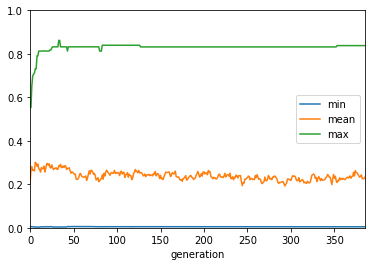

In [38]:
fig = plt.figure()
ax = fig.gca()

evaluation["performance_ratio"].plot(ax=ax)
ax.set_ylim(0, 1)

In [39]:
evaluation_0 = eval_df[eval_df["pareto_front"] == 0].groupby("generation").agg({"price": ["min", "mean", "max"], "overall": ["min", "mean", "max"], "chemistry": ["min", "mean", "max"]})

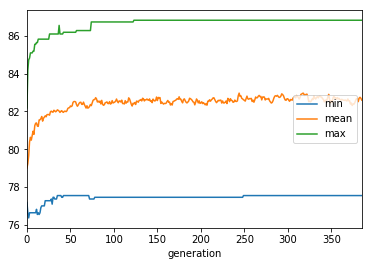

In [40]:
evaluation_0["overall"].plot()

In [42]:
pd.DataFrame([individual.phenotype for individual in population.values() if 
              (individual.fitness != {} and individual.fitness["pareto_front"] == 0)\
              and individual.phenotype["overall"] >= 80 \
              and individual.phenotype["chemistry"] >= 90]).sort_values("price")

,_id,chemistry,generation,overall,pareto_front,price
0,391006,95,385,80.545455,0,14300
78,391983,95,385,80.545455,0,14300
65,391812,95,385,80.545455,0,14300
6,391056,95,385,80.545455,0,14300
27,391261,95,385,80.545455,0,14300
21,391181,95,385,80.545455,0,14300
73,391907,97,385,80.818182,0,14850
62,391782,97,385,80.818182,0,14850
45,391491,97,385,80.818182,0,14850
42,391442,97,385,80.818182,0,14850


In [43]:
my_genotype = [individual for individual in population.values() if individual.individual_id == 391006][0].genotype

In [44]:
print(my_genotype)

ST:	Player(id=1027, name=Volland, club=Bayer 04 Leverkusen, league=Bundesliga, nationality=Germany, position=ST, overall=81, price=750)
LM:	Player(id=1256, name=Bittencourt, club=TSG 1899 Hoffenheim, league=Bundesliga, nationality=Germany, position=LM, overall=79, price=500)
CML:	Player(id=195, name=Götze, club=Borussia Dortmund, league=Bundesliga, nationality=Germany, position=CM, overall=82, price=950)
CMR:	Player(id=868, name=Rabiot, club=Paris Saint-Germain, league=Ligue 1 Conforama, nationality=France, position=CM, overall=83, price=2300)
RM:	Player(id=13266, name=Marcos Lopes, club=AS Monaco Football Club SA, league=Ligue 1 Conforama, nationality=Portugal, position=RM, overall=80, price=550)
LWB:	Player(id=1259, name=Schulz, club=TSG 1899 Hoffenheim, league=Bundesliga, nationality=Germany, position=LWB, overall=78, price=800)
CBL:	Player(id=397, name=Christensen, club=Chelsea, league=Premier League, nationality=Denmark, position=CB, overall=82, price=1500)
CB:	Player(id=393, name